# Final Project

Author: Kamila Makhambetova

## Problem 1

### 1.1

\begin{equation}
\text { Equations of motion for the position (x,y) of the cannonball:}
\end{equation}

\begin{equation}
\ddot{x}=-
\frac{\pi R^2 \rho C}{2m} 
\dot{x}
\sqrt{\dot{x}^2+\dot{y}^2}
\\
\ddot{y}=-g-
\frac{\pi R^2 \rho C}{2m} 
\dot{y}
\sqrt{\dot{x}^2+\dot{y}^2}
\end{equation}

\begin{equation}
\text { where R is sphere's radius, $\rho$ -density of air, C-coefficient of drag, m-mass of cannonball, g-acceleration due to gravity,}
\\
\text{$\dot{x}$ , $\ddot{x}$ - the $1^{st}$ and $2^{nd}$ derivatives of x with respect to time, $\dot{y}$ , $\ddot{y}$ -the $1^{st}$ and $2^{nd}$ derivatives of y with respect to time.}
\end{equation}

### 1.2

\begin{equation}
\dot{u}_1=v_1
\\
\dot{v}_1=-
\frac{\pi R^2 \rho C}{2m} v_1
\sqrt{{v_1}^2+{v_2}^2}
\end{equation}

\begin{equation}
\dot{u}_2=v_2
\\
\dot{v}_2=-g-
\frac{\pi R^2 \rho C}{2m} v_2
\sqrt{{v_2}^2+{v_1}^2}
\end{equation}

\\
\begin{equation}
\text{Equations were derived by substitution:}
\end{equation}

\begin{equation}
u_1=x
\\
v_1=\dot{x}
\\
u_2=y
\\
v_2=\dot{y}
\end{equation}

### 1.3

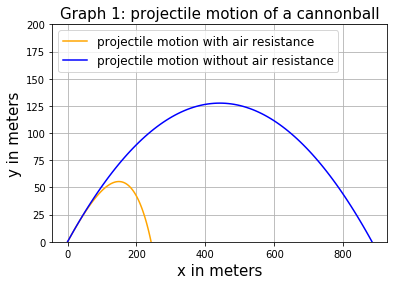

In [114]:
import matplotlib.pyplot as plt
import numpy as np

m=1  
R=0.08
theta=(30*np.pi)/180  
v=100  
rho=1.22  
C=0.47  
g=9.8
x0=v*np.cos(theta)
y0=v*np.sin(theta)
c=(np.pi*(R**2)*rho*C)/(2*m)

#first order DE
def u1(x):
    return x

def dv1(v1,v2):
    return -c*v1*np.sqrt(v1**2+v2**2)

def u2(y):
    return y

def dv2(v1,v2):
    return -g-c*v2*np.sqrt(v1**2+v2**2)

#coefficients for RK4
def K1(h,f,arr1,arr2):
    return h*f(arr1,arr2)

def K11(h,f,arr):
    return h*f(arr)

def K2(h,f,arr1,arr2,k1,k2,d):
    return h*f(arr1+d*k1,arr2+d*k2)

def K22(h,f,arr,k1,d):
    return h*f(arr+d*k1)

    
#RK4 code was taken and modified from e-book, the detailed information about source is mentioned under graph 1.
#Title of e-book: "Computational Mechanics featuring Matlab"
#Author:Richard Sonnenfeld
#Date of publication: August 20,2012
#Source:http://kestrel.nmt.edu/~rsonnenf/phys241/compmech_rev1.42.pdf

def RK4(x0,y0,t):
    h=t[1]-t[0]
    n=len(t)
    x=np.zeros(n)
    y=np.zeros(n)
    vx=np.zeros(n)
    vy=np.zeros(n)
    vx[0]=x0
    vy[0]=y0
    i=0
    for i in range(0,n-1):
        k11=K1(h,dv1,vx[i],vy[i])
        k12=K1(h,dv2,vx[i],vy[i])
        c11=K11(h,u1,vx[i])
        c12=K11(h,u2,vy[i])
        
        k21=K2(h,dv1,vx[i],vy[i],k11,k12,0.5)
        k22=K2(h,dv2,vx[i],vy[i],k11,k12,0.5)
        c21=K22(h,u1,vx[i],k11,0.5)
        c22=K22(h,u2,vy[i],k12,0.5)
        
        k31=K2(h,dv1,vx[i],vy[i],k21,k22,0.5)
        k32=K2(h,dv2,vx[i],vy[i],k21,k22,0.5)
        c31=K22(h,u1,vx[i],k21,0.5)
        c32=K22(h,u2,vy[i],k22,0.5)
        
        k41=K2(h,dv1,vx[i],vy[i],k31,k32,1)
        k42=K2(h,dv2,vx[i],vy[i],k31,k32,1)
        c41=K22(h,u1,vx[i],k31,1)
        c42=K22(h,u2,vy[i],k32,1)
        
        vx[i+1]=vx[i]+k11/6+k21/3+k31/3+k41/6
        vy[i+1]=vy[i]+k12/6+k22/3+k32/3+k42/6
        x[i+1]=x[i]+c11/6+c21/3+c31/3+c41/6
        y[i+1]=y[i]+c12/6+c22/3+c32/3+c42/6
        
    return x,y

h=0.1
t=np.arange(0,10.3,h)
x,y=RK4(x0,y0,t)

#for x,y without air resistance 
xwar=np.zeros(len(t))
ywar=np.zeros(len(t))
for i in range(0,len(t)):
    xwar[i]=x0*t[i]
    ywar[i]=y0*t[i]-0.5*g*(t[i]**2)
    
#graphs
plt.title('Graph 1: projectile motion of a cannonball',size=15)
plt.plot(x,y,color='orange',label='projectile motion with air resistance')
plt.plot(xwar,ywar,color='blue',label='projectile motion without air resistance')

plt.xlabel(r'x in meters',size=15)
plt.ylabel(r'y in meters',size=15)
plt.legend(loc='upper left',fontsize=12)
plt.ylim((0,200))

plt.grid()
plt.show()


Code for RK4 method was taken from e-book:"Computational Mechanics featuring Matlab",
<br>Author: Richard Sonnenfeld,
<br>Date of publication: August 20,2012
<br>Chapter: CHAPTER 8. RUNGE-KUTTA METHOD AND ORBITAL SIMULATION, pg.172. 
<br> Original language of code: MATLAB
<br>Comment: I a little bit modified this code

### 1.4

In [89]:
def totdist(x,y):
    n=len(x)-1
    x2=np.zeros(n)
    y2=np.zeros(n)
    
    for i in range(0,n):
        x2[i]=x[i+1]
        y2[i]=y[i+1]
        
    ymin=np.min(np.abs(y2))
    
    for i in range(0,len(x2)):
        if(np.abs(y2[i])==ymin):
            return x2[i]
            break

dist=totdist(x,y)

print(f'total distance (over horiz ground) with air resistance={dist} m')

        

total distance (over horiz ground) with air resistance=242.65616794466666 m


### 1.5

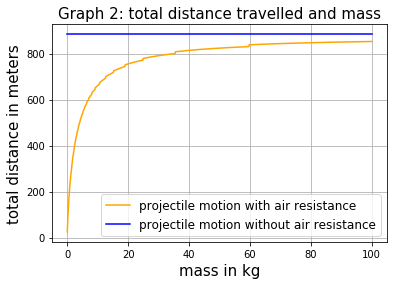

In [96]:
c2=(np.pi*(R**2)*rho*C)/2

#first order DE
def u1(x):
    return x

def dv1(v1,v2,m):
    return -(c2/m)*v1*np.sqrt(v1**2+v2**2)

def u2(y):
    return y

def dv2(v1,v2,m):
    return -g-(c2/m)*v2*np.sqrt(v1**2+v2**2)

#coefficients for RK4
def K1(h,f,arr1,arr2,m):
    return h*f(arr1,arr2,m)

def K11(h,f,arr):
    return h*f(arr)

def K2(h,f,arr1,arr2,k1,k2,d,m):
    return h*f(arr1+d*k1,arr2+d*k2,m)

def K22(h,f,arr,k1,d):
    return h*f(arr+d*k1)

#modified RK4, mass was added as input
def RK4(x0,y0,t,m):
    h=t[1]-t[0]
    n=len(t)
    x=np.zeros(n)
    y=np.zeros(n)
    vx=np.zeros(n)
    vy=np.zeros(n)
    vx[0]=x0
    vy[0]=y0
    i=0
    for i in range(0,n-1):
        k11=K1(h,dv1,vx[i],vy[i],m)
        k12=K1(h,dv2,vx[i],vy[i],m)
        c11=K11(h,u1,vx[i])
        c12=K11(h,u2,vy[i])
        
        k21=K2(h,dv1,vx[i],vy[i],k11,k12,0.5,m)
        k22=K2(h,dv2,vx[i],vy[i],k11,k12,0.5,m)
        c21=K22(h,u1,vx[i],k11,0.5)
        c22=K22(h,u2,vy[i],k12,0.5)
        
        k31=K2(h,dv1,vx[i],vy[i],k21,k22,0.5,m)
        k32=K2(h,dv2,vx[i],vy[i],k21,k22,0.5,m)
        c31=K22(h,u1,vx[i],k21,0.5)
        c32=K22(h,u2,vy[i],k22,0.5)
        
        k41=K2(h,dv1,vx[i],vy[i],k31,k32,1,m)
        k42=K2(h,dv2,vx[i],vy[i],k31,k32,1,m)
        c41=K22(h,u1,vx[i],k31,1)
        c42=K22(h,u2,vy[i],k32,1)
        
        vx[i+1]=vx[i]+k11/6+k21/3+k31/3+k41/6
        vy[i+1]=vy[i]+k12/6+k22/3+k32/3+k42/6
        x[i+1]=x[i]+c11/6+c21/3+c31/3+c41/6
        y[i+1]=y[i]+c12/6+c22/3+c32/3+c42/6
        
    return x,y

def totdist(x,y):
    n=len(x)-1
    x2=np.zeros(n)
    y2=np.zeros(n)
    
    for i in range(0,n):
        x2[i]=x[i+1]
        y2[i]=y[i+1]
        
    ymin=np.min(np.abs(y2))
    for i in range(0,len(x2)):
        if(np.abs(y2[i])==ymin):
            return x2[i]
            break

#return array of total horiz distance as function of mass
def totdistmass(m,x0,y0,t):
    distm=np.zeros(len(m))
    for i in range (0,len(m)):
        x,y=RK4(x0,y0,t,m[i])
        #print(x,y)
        distm[i]=totdist(x,y)
        #print(distm[i])
    return distm

m=np.arange(0.05,100,0.1)
distm=totdistmass(m,x0,y0,t)
totdistwoar=((v**2)*np.sin(2*theta))/g

#array of distance without air resistancee
disrwar=[]
for i in range(0,len(m)):
    disrwar.append(totdistwoar)
    
#graphs
plt.title('Graph 2: total distance travelled and mass',size=15)
plt.plot(m,distm,color='orange',label='projectile motion with air resistance')
plt.plot(m,disrwar,color='blue',label='projectile motion without air resistance')

plt.xlabel(r'mass in kg',size=15)
plt.ylabel(r'total distance in meters',size=15)
plt.legend(loc='lower right',fontsize=12)

plt.grid()
plt.show()


### 1.6

Based on graph 2: "Total distance travelled and mass", it can be seen that when mass increases total travelled horizontal distance increases too in the beginning, after some mass, the function becomes horizontal, i.e. after some max mass is achieved, the next increases in mass doen't not significantly affect total horizontal distance of the  ball under effect of air resistance

## Problem 2

### 2.1

In [12]:
import numpy as np

datafile = 'data.txt'
file = open(datafile, 'r')
contents = file.read()
file.close()
contents

Data = np.loadtxt(datafile, comments='#')
years=Data[:,0]
meas=Data[:,1]

def polyn1(x,y):
    sx=0
    sy=0
    sx2=0
    sxy=0
    
    for i in range(0,len(x)):
        sx=sx+x[i]
        sy=sy+y[i]
        sx2=sx2+x[i]*x[i]
        sxy=sxy+x[i]*y[i]
        
    a0=(sy*sx2-sxy*sx)/(len(x)*sx2-sx**2)
    a1=(len(x)*sxy-sx*sy)/(len(x)*sx2-sx**2)
    return a0,a1

a,b=polyn1(years,meas)
print(f'For polynomial fit of degree n=1: a0={a}, a1={b}')

For polynomial fit of degree n=1: a0=-2758.943681207381, a1=1.5656737982768576


### 2.2

In [13]:
def polyn2(x,y):
    sx=0
    sy=0
    sx2=0
    sxy=0
    syx2=0
    sx3=0
    sx4=0
    
    for i in range(0,len(x)):
        sx=sx+x[i]
        sy=sy+y[i]
        sx2=sx2+x[i]*x[i]
        sxy=sxy+x[i]*y[i]
        syx2=syx2+y[i]*(x[i]**2)
        sx3=sx3+x[i]**3
        sx4=sx4+x[i]**4
        
    detA=len(x)*(sx2*sx4-sx3**2)-sx*(sx*sx4-sx3*sx2)+sx2*(sx*sx3-sx2**2)
    a0=(sy*(sx2*sx4-sx3**2)-sx*(sxy*sx4-sx3*syx2)+sx2*(sxy*sx3-sx2*syx2))/detA
    a1=(len(x)*(sxy*sx4-syx2*sx3)-sy*(sx*sx4-sx3*sx2)+sx2*(sx*syx2-sxy*sx2))/detA
    a2=(len(x)*(sx2*syx2-sx3*sxy)-sx*(sx*syx2-sxy*sx2)+sy*(sx*sx3-sx2**2))/detA
    return a0,a1,a2

c,d,e=polyn2(years,meas)
print(f'For polynomial fit of degree n=2: a0={c}, a1={d}, a2={e}')


For polynomial fit of degree n=2: a0=47062.18317725434, a1=-48.54710617568969, a2=0.01260057928259697


### 2.3

In [14]:
def resid(y,yapp):
    sumres=0
    for i in range (0,len(y)):
        sumres=sumres+(y[i]-yapp[i])**2
    return sumres

def f1(x):
    return a+b*x

def f2(x):
    return c+d*x+e*(x**2)

y1=f1(years)
y2=f2(years)

res1=resid(meas,y1)
res2=resid(meas,y2)

print(f'For polynomial fit of degree n=1: resudial={res1}')
print(f'For polynomial fit of degree n=2: resudial={res2}')

For polynomial fit of degree n=1: resudial=713.3569985292116
For polynomial fit of degree n=2: resudial=28.223661337434727


Residual of quadratic polynomial=28.223 is less than residual of linear polynomial=713.356.
<br>The results mean quadratic polynomial fits given data much better and more precise than linear polynomial, as residual calculates sum of squares of difference between given value and approximate value.


### 2.4

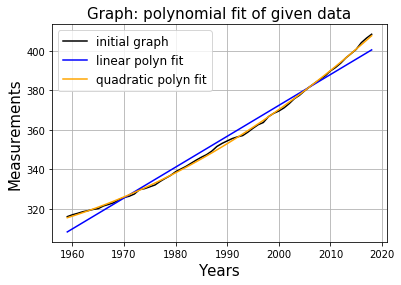

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Graph: polynomial fit of given data',size=15)
plt.plot(years,meas,color='black',label='initial graph')
plt.plot(years,y1,color='blue',label='linear polyn fit')
plt.plot(years,y2,color='orange',label='quadratic polyn fit')

plt.xlabel(r'Years',size=15)
plt.ylabel(r'Measurements',size=15)
plt.legend(loc='upper left',fontsize=12)

plt.grid()
plt.show()